<a href="https://colab.research.google.com/github/varibeirosoares/mvp_cienciasdedados_retail/blob/main/MVP_retail_vanessaribeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós-Graduação em Ciência de Dados e Analytics - PUC-Rio**
# **MVP - Análise de Dados e Boas Práticas**
# **Aluna: Vanessa Ribeiro (Maio/2023)**




## Definição do Problema

O dataset escolhido para este trabalho refere-se à todas as transações ocorridas para um varejo on-line registrado e baseado no Reino Unido, sem loja, entre 12/01/2009 e 12/09/2011. A empresa vende principalmente presentes exclusivos para todas as ocasiões. Muitos clientes da empresa são atacadistas.

Nosso objetivo neste trabalho é realizar a análise exploratória e o pré-processamento dos dados de entrada, para que em etapas futuras possamos trabalhar com técnicas de aprendizado supervisionados no sentido de conseguir predições de volume a ser vendido por mês, produtos ou cliente.

### Informações sobre os atributos iniciais

**Invoice**: Número da fatura. Nominal. Um número integral de 6 dígitos atribuído exclusivamente a cada transação. Se este código começar com a letra 'c', indica um cancelamento.

**StockCode**: Código do produto (item). Nominal. Um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto.

**Description**: Nome do produto (item). Nominal.

**Quantity**: As quantidades de cada produto (item) por transação. Numérico.

**InvoiceDate**: Data e hora da fatura. Numérico. O dia e a hora em que uma transação foi gerada.

**Price**: preço unitário. Numérico. Preço do produto por unidade em libras esterlinas (£).

**CustomerID**: Número do cliente. Nominal. Um número integral de 5 dígitos atribuído exclusivamente a cada cliente.

**Country**: Nome do país. Nominal. O nome do país onde um cliente reside.



In [160]:
# Importando as bibliotecas que poderão ser utilizadas na análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Carga dos Dados
Inicialmente realizamos a carga do dataset. O arquivo .xlsx originalmente disponibilizado se encontra no link do drive. 
O dataset original conta com duas abas "Year 2009-2010" e "Year 2010-2011" Ambas com o mesmo tipo de dado. Vamos considerar para a análise somente uma aba, pois já atende o objetivo da análise.
Utilizaremos o comando read_excel.

In [161]:
#indicando a url que o dataset está hospedado
url = "https://drive.google.com/u/1/uc?id=1NcvJ3ca-6OeUUHriRW2p06_NsHZ4EvPu&export=download"


#lendo o arquivo depositado na url para carregar como dataframe
df = pd.read_excel(url, sheet_name= "Year 2009-2010")



##Análise Exploratória Preliminar


###Estatísticas Descritivas
Iniciando a etapa de análise exploratória preliminar, listamos as dimensões do dataset:

In [162]:
#observando as dimensões do dataset
df.shape

(525461, 8)

A seguir, examinamos mais informações sobre o tipo de dados de cada colunas:

In [163]:
#lendo o tipo de dado de cada coluna do dataset
print(df.dtypes)

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


Listamos a seguir os primeiros e últimos registros do dataset

In [164]:
#listando as primeiras linhas do dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [165]:
#listando as últimas linhas do dataset
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


A seguir vamos determinar a distribuição das variáveis ​​numéricas utilizando o método describe.

In [166]:
#gerando o resumo estatístico do dataset
df.describe()


,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


Analisando o resumo estatístico do dataset:


*   existem valores negativos na coluna **quatify** e **price**que podem ser explicados em caso de devolução de vendas, na descrição dos dados do dataset foi sinalizado que este tipo de situação poderia ocorrer e que esses casos seriam identificados com a letra C no inicio da coluna **invoice**
*   os dados máximos também estão discrepantes em relação ao restante do dataset.



In [167]:
#listando os dados com valores negativos na coluna quantity
df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


Valores negativos na coluna Quantity precisam de mais investigação posterior para decidir como deve ser tratado.

Nesta etapa podemos observar valores ausentes na coluna **Description** e **Customer ID** que precisarão ser tratados na etapa de pré-processamento.

In [168]:
#quantificando valores ausentes por colunas
df.isnull().sum()


Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [169]:
#listando valores negativos na coluna price
df[df['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Os valores negativos da coluna Price referem-se a transações que não são vendas e sim ajustes de estoque. Deverão ser filtrados da análise na fase de pré-processamento de dados.

In [170]:
#examinando os dados extremos com base na coluna quantity
df.sort_values(by='Quantity', ascending=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark
...,...,...,...,...,...,...,...,...
194372,507913,10120,Zebra invcing error,-9000,2010-05-11 17:16:00,0.00,NaN,United Kingdom
428975,530348,16235,?,-9000,2010-11-02 15:48:00,0.00,NaN,United Kingdom
156488,504311,22197,NaN,-9200,2010-04-12 14:39:00,0.00,NaN,United Kingdom
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom


Os maiores valores da coluna quantity realmente são registros de vendas e não devem ser filtrados da análise. Os menores valores não têm características de registros de vendas, seja pela ausência de descrição do produto vendido, ausência da identificação do comprador, ou pela presença da letra C antes do número de registro de venda (isso caracteriza um cancelamento pelas especificações do dataset original)

In [171]:
#examinando os dados extremos com base na coluna Price
df.sort_values(by='Price', ascending=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
522565,537872,21595,NaN,1,2010-12-08 18:07:00,0.00,NaN,United Kingdom
517295,537534,22474,SPACEBOY TV DINNER TRAY,1,2010-12-07 11:48:00,0.00,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom


Os dados extremos da coluna Price não se referam a dados de vendas, pelos mesmos motivos dos dados de Quantity (falta descrição do produto vendido, identificação do comprador, transações de ajuste de estoque ou cancelamento de venda). De acordo com as informações listadas acima, precisaremos filtrar essas linhas na etapa de pré-processamento de dados.

### Visualizações Iniciais
Iniciando a fase de análise exploratória visual do dataset original, ainda sem tratamento dos dados.

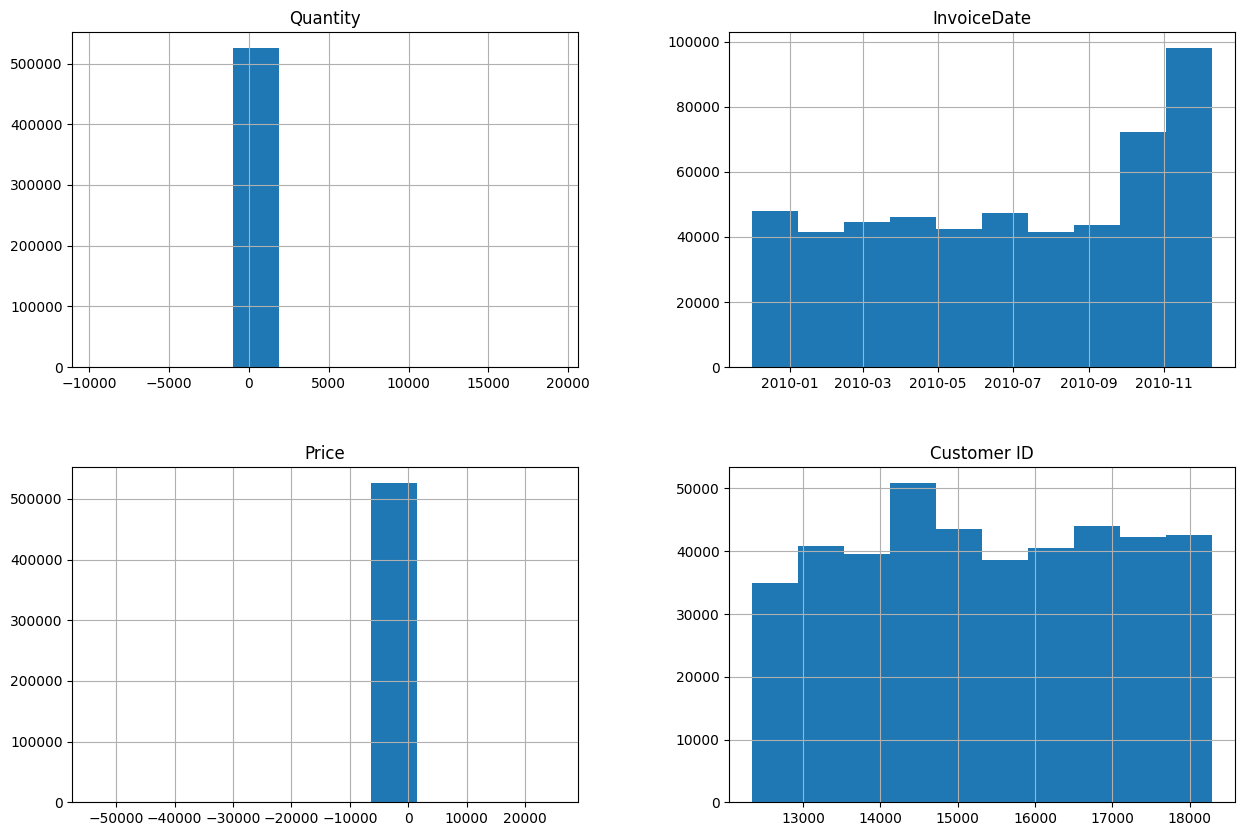

In [172]:
# Histograma
df.hist(figsize = (15,10))
plt.show()

Pelo histograma percebemos a concentração de venda em quantidades sempre menores que 2500, preços sempre em um escala menor, volume de registros de vendas aumentam nos últimos meses do ano.

Vamos avançar para a etapa de pré-processamento cientes de que precisamos tratar o dataset com os seguintes ajustes:

*   eliminar valores negativos e zerados nas colunas Quantity e Price
*   Tratar linhas sem descrição do produto vendido
*   Tratar linhas sem identificação do país que originou a venda






##Pré-processamento

In [173]:
#definindo um novo dataframe sem as linhas com quantidades negativas
df1 = df.loc[df['Quantity']>=0]

#definindo um novo dataframe sem as linhas com preços negativos
df2 = df1.loc[df1['Price']>=0]

#exibindo o df2 
print(df2)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

Observamos que restaram 513132 linhas no dataset, o que representa 97% do total do dataset, sinal verde para continuarmos. Seguiremos tratando os dados do df2, agora observando as linhas onde temos valores nulos nas colunas Description e CustomerID.

In [174]:
#filtrando linhas com valores nulos ou inválidos
df3 = df2.dropna()

print(df3)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 


Depois do tratamento das linhas com valores nulos, ou negativos, restaram 77,5% das linhas do dataset. Vamos repetir os passos de análise exploratória do dataset.



In [175]:
#apresentando o resumo estatístivo do dataset
df3.describe()

,Quantity,Price,Customer ID
count,407695.000000,407695.000000,407695.000000
mean,13.586686,3.294188,15368.504107
std,96.842229,34.756655,1679.795700
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


O problema de quantidades negativas foi resolvido, vamos checar as linhas onde o Price é 0 para entender esses registros e definir como tratar.

In [176]:
#criando a lista de linhas com preços zerados
df3_preçoszerados = df3.loc[df3['Price'] == 0]
print(df3_preçoszerados)

       Invoice StockCode                        Description  Quantity  \
4674    489825     22076                 6 RIBBONS EMPIRE          12   
6781    489998     48185                DOOR MAT FAIRY CAKE         2   
16107   490727         M                             Manual         1   
18738   490961     22065     CHRISTMAS PUDDING TRINKET POT          1   
18739   490961     22142       CHRISTMAS CRAFT WHITE FAIRY         12   
32916   492079     85042          ANTIQUE LILY FAIRY LIGHTS         8   
40101   492760     21143    ANTIQUE GLASS HEART DECORATION         12   
47126   493761     79320                    FLAMINGO LIGHTS        24   
48342   493899     22355        CHARLOTTE BAG , SUKI DESIGN        10   
57619   494607     21533          RETRO SPOT LARGE MILK JUG        12   
89084   497819   TEST001            This is a test product.         5   
89180   497843   TEST001            This is a test product.         5   
111348  500073     21662         VINTAGE GLASS COFF

In [177]:
#observando as dimensões da lista de preços zerados
df3_preçoszerados.shape

(31, 8)

As linhas 16107, 89084 e 89180 não têm características de vendas, e sim de ajustes ou testes que podem poluir a análise. Sendo assim filtraremos esses dados do dataset. As demais linhas têm características de bonificação e não vendas, como o objetivo da análise é entender a influência do comportamento do preço no volume final de venda, vamos filtrar do dataset para prosseguir.   

In [178]:
#filtrando as linhas com preços zerados do df3
df4 = df3.drop(df3[df3['Price'] == 0].index)
print(df4)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

Vamos observar o resumo estatístico do df4

In [179]:
#gerando resumo estatístico do df4
df4.describe()

,Quantity,Price,Customer ID
count,407664.000000,407664.000000,407664.000000
mean,13.585585,3.294438,15368.592598
std,96.840747,34.757965,1679.762138
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


Vamos seguir para análise dos valores máximos

<Axes: >

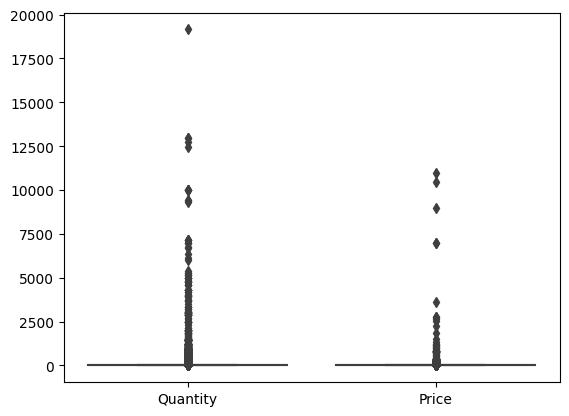

In [180]:
#plotando um boxplot para entender a distribução das variáveis Quantity e Price
sns.boxplot(data=df4[['Quantity', 'Price']])


Na fase de análise inicial identificamos que os valores extremos da coluna Quantity eram realmente referente a vendas, mas os valores extremos da coluna Price precisavam de mais análise. Vamos gerar um novo bloxplot somente com a coluna Price com uma escala diferente que nos permita observar mais detalhadamente esses extremos.

<Axes: >

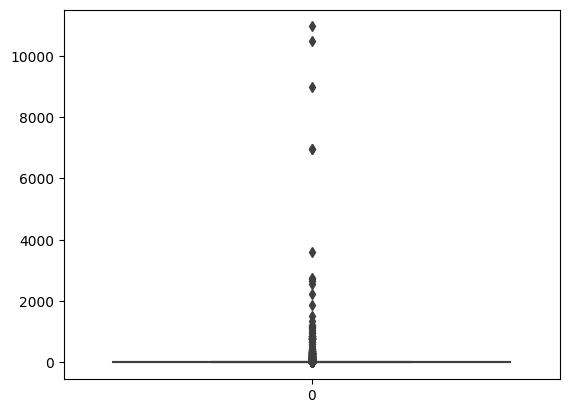

In [181]:
sns.boxplot(data=df4['Price'])


Vamos criar uma lista com Preços acima de 3700 para observação.

In [182]:
#criando a lista de linhas com preços acima de 3700
df4_preçosmaiores = df4.loc[df4['Price'] >=3700]
print(df4_preçosmaiores)

       Invoice StockCode Description  Quantity         InvoiceDate     Price  \
74356   496115         M      Manual         1 2010-01-29 11:04:00   8985.60   
129903  501766         M      Manual         1 2010-03-19 11:35:00   6958.17   
129987  501768         M      Manual         1 2010-03-19 11:45:00   6958.17   
135013  502263         M      Manual         1 2010-03-23 15:22:00  10953.50   
358639  524159         M      Manual         1 2010-09-27 16:12:00  10468.80   

        Customer ID         Country  
74356       17949.0  United Kingdom  
129903      15760.0          Norway  
129987      15760.0          Norway  
135013      12918.0  United Kingdom  
358639      14063.0  United Kingdom  


Os valores extremos têm em comum a sinalização de acerto Manual. Vamos examinar no dataset quais as transações que tem descrição de acerto Manual.

In [183]:
#criando a lista de linhas com descrição Manual
df4_transaçãomanual = df4.loc[df4['Description'] == 'Manual']
print(df4_transaçãomanual)

       Invoice StockCode Description  Quantity         InvoiceDate  Price  \
11310   490300         M      Manual         1 2009-12-04 14:19:00   0.85   
11311   490300         M      Manual         1 2009-12-04 14:19:00   0.21   
17386   490760         M      Manual         1 2009-12-08 09:49:00  10.00   
17887   490881         M      Manual         1 2009-12-08 12:58:00  10.00   
19542   490999         M      Manual         1 2009-12-08 17:26:00  15.95   
...        ...       ...         ...       ...                 ...    ...   
516892  537435         M      Manual         2 2010-12-06 16:58:00   5.95   
521074  537800         M      Manual        12 2010-12-08 13:08:00   0.19   
521122  537804         M      Manual        12 2010-12-08 13:17:00   2.95   
521124  537804         M      Manual        12 2010-12-08 13:17:00   0.19   
524776  538147         M      Manual         1 2010-12-09 16:11:00  15.00   

        Customer ID         Country  
11310       12970.0  United Kingdom  

Conscientes que não se referem a venda de um produto, vamos filtrar da análise.

In [184]:
#filtrando as linhas com Descrição de transação Manual
df5 = df4.drop(df4[df4['Description'] == 'Manual'].index)
print(df5)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

Vamos analisar novamente o resumo estatístico depois das transformações.

In [185]:
#resumo estatístico do df5
df5.describe()

,Quantity,Price,Customer ID
count,407239.000000,407239.000000,407239.000000
mean,13.593305,3.060709,15368.553653
std,96.889897,5.100975,1679.744791
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,850.000000,18287.000000


A distância entre o valor do Q3 e o valor máximo ainda é grande na coluna Price. Vamos plotar um novo bloxpot.

<Axes: >

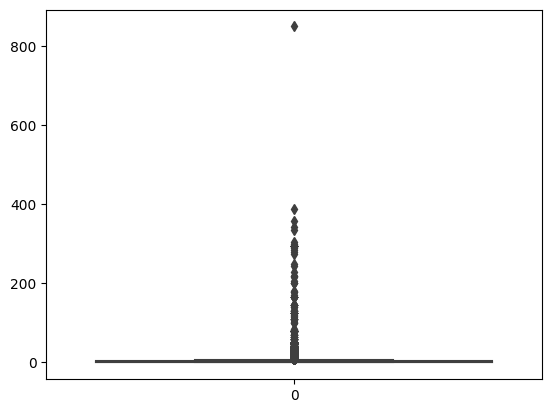

In [186]:
#plotando o bloxpot do df5 para a coluna Price
sns.boxplot(data=df5['Price'])

Ainda temos valores extremos, vamos gerar uma nova lista para observar.

In [187]:
#criando a lista de linhas com Price > 200
df5_pricemaior350 = df5.loc[df5['Price'] >= 200]
print(df5_pricemaior350)

       Invoice StockCode                          Description  Quantity  \
21450   491094      POST                              POSTAGE         1   
70977   495735    ADJUST  Adjustment by john on 26/01/2010 16         1   
70978   495734    ADJUST  Adjustment by john on 26/01/2010 16         1   
71038   495755    ADJUST  Adjustment by john on 26/01/2010 16         1   
71042   495758    ADJUST  Adjustment by john on 26/01/2010 16         1   
71071   495791    ADJUST  Adjustment by john on 26/01/2010 17         1   
71082   495802    ADJUST  Adjustment by john on 26/01/2010 17         1   
109791  499959      POST                              POSTAGE         1   
156048  504193      POST                              POSTAGE         1   
180603  506487      POST                              POSTAGE         1   
183379  506839      POST                              POSTAGE         1   
200411  508637      POST                              POSTAGE         1   
201076  508728      POST 

In [188]:
#criando a lista de linhas com StockCode = Post
df5_post = df5.loc[df5['StockCode'] =='POST']
print(df5_post)

       Invoice StockCode Description  Quantity         InvoiceDate  Price  \
89      489439      POST     POSTAGE         3 2009-12-01 09:28:00   18.0   
126     489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.0   
173     489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.0   
625     489526      POST     POSTAGE         6 2009-12-01 11:50:00   18.0   
1244    489557      POST     POSTAGE         4 2009-12-01 12:52:00   18.0   
...        ...       ...         ...       ...                 ...    ...   
522916  537967      POST     POSTAGE         1 2010-12-09 11:31:00   18.0   
522930  537995      POST     POSTAGE         2 2010-12-09 11:39:00   18.0   
522974  538003      POST     POSTAGE         8 2010-12-09 12:05:00   18.0   
523064  538008      POST     POSTAGE         5 2010-12-09 12:17:00   18.0   
524491  538093      POST     POSTAGE         5 2010-12-09 14:49:00   18.0   

        Customer ID  Country  
89          12682.0   France  
126         1

In [189]:
#criando a lista de linhas com StockCode = Adjust
df5_adjust = df5.loc[df5['StockCode'] =='ADJUST']
print(df5_adjust)

      Invoice StockCode                          Description  Quantity  \
70976  495733    ADJUST  Adjustment by john on 26/01/2010 16         1   
70977  495735    ADJUST  Adjustment by john on 26/01/2010 16         1   
70978  495734    ADJUST  Adjustment by john on 26/01/2010 16         1   
70980  495736    ADJUST  Adjustment by john on 26/01/2010 16         1   
70985  495742    ADJUST  Adjustment by john on 26/01/2010 16         1   
71022  495745    ADJUST  Adjustment by john on 26/01/2010 16         1   
71023  495748    ADJUST  Adjustment by john on 26/01/2010 16         1   
71033  495747    ADJUST  Adjustment by john on 26/01/2010 16         1   
71034  495750    ADJUST  Adjustment by john on 26/01/2010 16         1   
71037  495756    ADJUST  Adjustment by john on 26/01/2010 16         1   
71038  495755    ADJUST  Adjustment by john on 26/01/2010 16         1   
71039  495753    ADJUST  Adjustment by john on 26/01/2010 16         1   
71040  495754    ADJUST  Adjustment by

In [190]:
#criando a lista de linhas com StockCode = Adjust2
df5_adjust2 = df5.loc[df5['StockCode'] =='ADJUST2']
print(df5_adjust2)

       Invoice StockCode                          Description  Quantity  \
249672  513564   ADJUST2  Adjustment by Peter on Jun 25 2010          1   
249673  513566   ADJUST2  Adjustment by Peter on Jun 25 2010          1   
249674  513565   ADJUST2  Adjustment by Peter on Jun 25 2010          1   

               InvoiceDate   Price  Customer ID         Country  
249672 2010-06-25 14:15:00  300.13      17050.0  United Kingdom  
249673 2010-06-25 14:15:00  358.47      17364.0  United Kingdom  
249674 2010-06-25 14:15:00   72.45      16422.0  United Kingdom  


Para a próxima fase filtraremos as linhas identificadas que também não se referem a vendas.

In [207]:
#filtrando as linhas com StockCode = POST
df6 = df5.drop(df5[df5['StockCode'] == 'POST'].index)

#filtrando as linhas com StockCode = ADJUST
df7 = df6.drop(df6[df6['StockCode'] == 'ADJUST'].index)

#filtrando as linhas com StockCode = ADJUST2
df8 = df7.drop(df7[df7['StockCode'] == 'ADJUST2'].index)
print(df8)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

<Axes: >

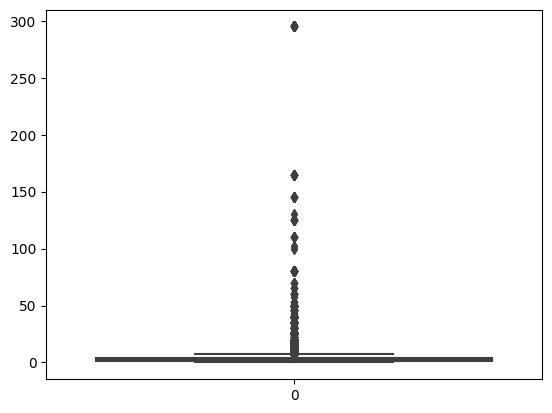

In [208]:
#plotando o bloxpot do df8 para a coluna Price
sns.boxplot(data=df8['Price'])

Vamos observar uma nova lista com preços acima de 100.

In [209]:
#criando a lista de linhas com Price > 100
df8_pricemaior100 = df8.loc[df8['Price'] >= 100]
df8_pricemaior100

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
106631,499601,21760,FRENCH STYLE WALL DRESSER,1,2010-03-01 12:34:00,125.0,13018.0,United Kingdom
118146,500663,21760,FRENCH STYLE WALL DRESSER,1,2010-03-09 12:10:00,125.0,17700.0,United Kingdom
148724,503547,21760,FRENCH STYLE WALL DRESSER,1,2010-04-01 14:52:00,125.0,14049.0,United Kingdom
168346,505347,21760,FRENCH STYLE WALL DRESSER,1,2010-04-21 13:56:00,125.0,16133.0,United Kingdom
193909,507843,21760,FRENCH STYLE WALL DRESSER,2,2010-05-11 13:51:00,110.0,15149.0,United Kingdom
...,...,...,...,...,...,...,...,...
498546,535993,22823,CHEST NATURAL WOOD 20 DRAWERS,1,2010-11-29 13:42:00,125.0,12870.0,United Kingdom
503184,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.0,13705.0,United Kingdom
507927,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.0,13145.0,United Kingdom
522366,537859,22828,REGENCY MIRROR WITH SHUTTERS,1,2010-12-08 16:11:00,165.0,14030.0,United Kingdom


Todos os exemplos parecem ser realmente vendas. Para prosseguirmos, adicionaremos ao dataset uma coluna com o valor total de venda por linha.


In [213]:
#criando a coluna 'Venda Total' no df8
df8['Venda Total'] = df8.apply(lambda row: row['Quantity'] * row['Price'], axis=1)


Em seguida vamos observar o comportamento da Venta Total no decorrer dos anos.

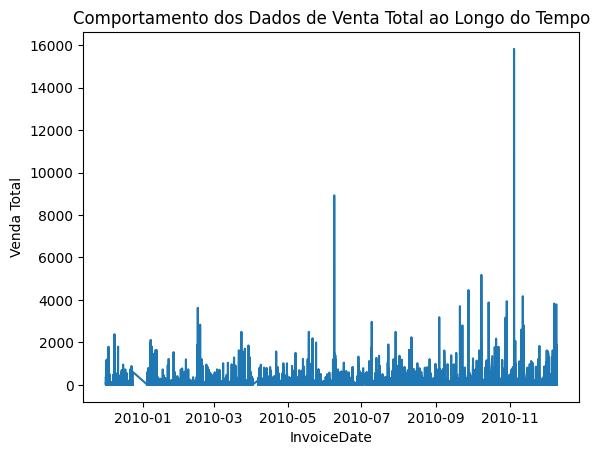

In [214]:
# Criar o gráfico de linha
plt.plot(df8['InvoiceDate'], df8['Venda Total'])

# Adicionar rótulos e título
plt.xlabel('InvoiceDate')
plt.ylabel('Venda Total')
plt.title('Comportamento dos Dados de Venta Total ao Longo do Tempo')

# Mostrar o gráfico
plt.show()

A venda total tem picos ao longo do ano, provavelmente em função de datas comemorativas, principalmente no final do ano. O que é aceitável, considerando que venda artigos de presentes.

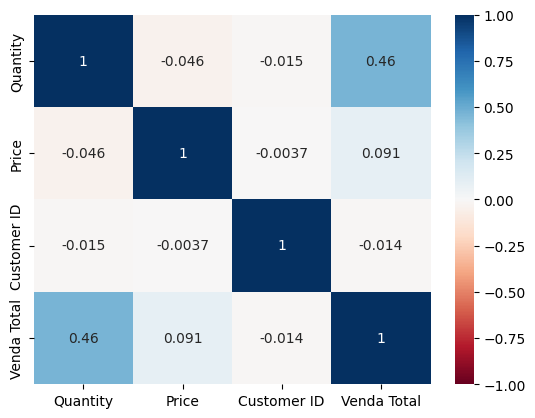

In [215]:
# Matriz de Correlação com Matplotlib Seaborn
numeric_cols = df8.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(df8[numeric_cols].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);


Com o gráfico de correlação, identificamos que a maior probabilidade de gerar uma venda de valor total maior é quando a quantidade do pedido é grande. Temos pouca correlação com o preço e o volume total de vendas.

Vamos agrupar os dados por volume vendido por produto e por cliente.

In [217]:
#criando um resumo de vendas por produto
resumo_produto = df8.groupby('StockCode', as_index=False, sort=False)['Venda Total'].sum()
print(resumo_produto)


     StockCode  Venda Total
0        85048      9717.00
1       79323P     13171.10
2       79323W     17384.80
3        22041      7338.30
4        21232     29779.86
...        ...          ...
4008     22932       169.05
4009     22937       127.50
4010     22936        29.25
4011     22935       227.25
4012     22933        35.40

[4013 rows x 2 columns]


In [219]:
#criando um resumo de vendas por cliente
resumo_cliente = df8.groupby('Customer ID', as_index=False, sort=False)['Venda Total'].sum()
print(resumo_cliente)

      Customer ID  Venda Total
0         13085.0      2017.20
1         13078.0     16904.51
2         15362.0       613.08
3         18102.0    349164.35
4         12682.0     10665.69
...           ...          ...
4281      18269.0       168.60
4282      13270.0       590.00
4283      12942.0       258.75
4284      13369.0       308.28
4285      15211.0       383.07

[4286 rows x 2 columns]


In [199]:
resumo_cliente.describe()

,Quantity,Price,Venda Total
count,4286.000000,4286.000000,4286.000000
mean,1291.058563,285.162353,2025.299110
std,6477.010735,652.511845,8830.009436
min,1.000000,0.190000,2.950000
25%,162.000000,55.180000,307.950000
50%,386.000000,131.785000,702.255000
75%,1001.000000,316.085000,1703.985000
max,220596.000000,23013.660000,349164.350000


Percebemos que temos na base 4013 produtos e 4286 clientes, de diferentes perfis.

[Text(0.5, 1.0, 'Distribuição de Venda Total por país de venda')]

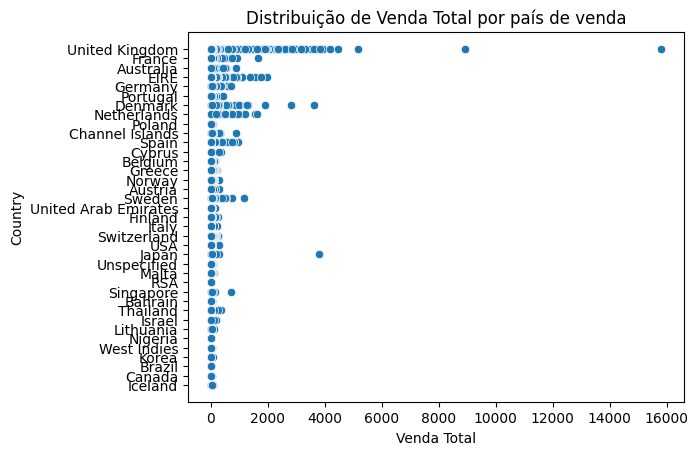

In [200]:
#plotando scatterplot
sns.scatterplot(x='Venda Total',y='Country',data=df8).set(title='Distribuição de Venda Total por país de venda')

Nesse gráfico observamos que o país com maior volume de vendas é o Reino Unido.

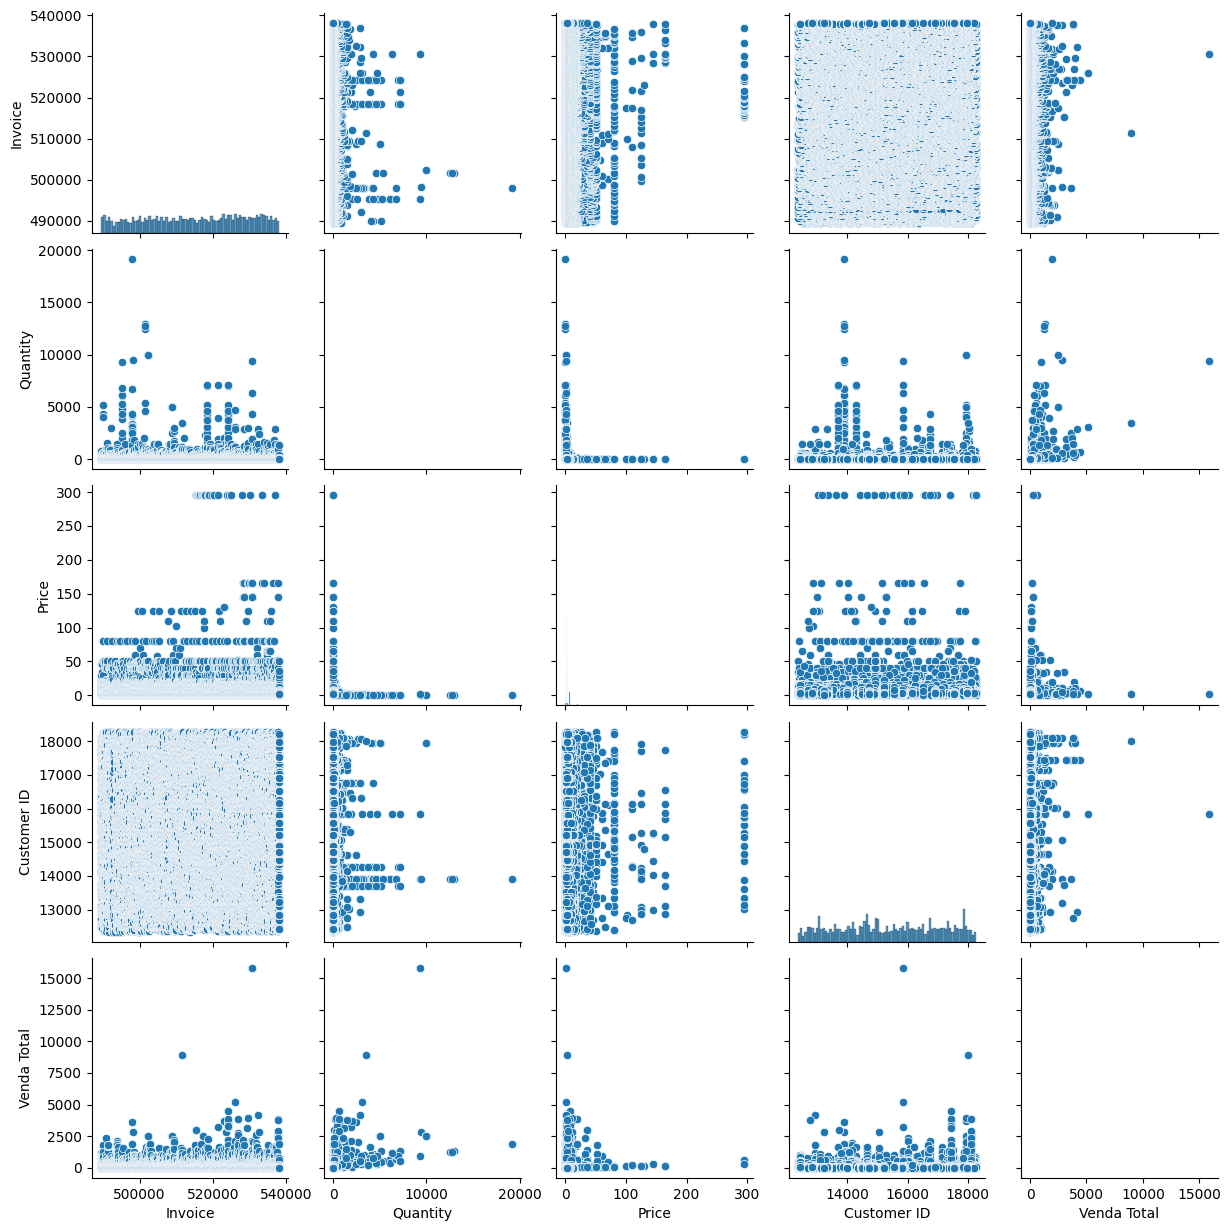

In [201]:
sns.pairplot(df8)

Valor total da venda é mais influenciado pela quantidade dos itens do que pelo Preço Unitário. Poucos cliente compram um grande valor. E existem perfis diferentes de clientes na base. A maioria deles com Venda Total menor do que 2500.

###Normalização e Padronização

Nessa etapa vamos utilizar de técnicas para normalização e padronização do dataset que posteriormente pode ser utilizado para criar um modelo de predição de volume de vendas, por produto, por cliente ou por mês.


In [202]:
#importando as classes de padronização e normalização
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 

In [203]:
# Normalização

# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# transformando os dados
normalizado_df8 = scaler.fit_transform(df8[['Price','Quantity','Venda Total']])
print(normalizado_df8)

[[2.35560121e-02 5.74382539e-04 5.27227819e-03]
 [2.28780437e-02 5.74382539e-04 5.12055613e-03]
 [2.28780437e-02 5.74382539e-04 5.12055613e-03]
 ...
 [1.27085177e-02 0.00000000e+00 2.37002493e-04]
 [1.27085177e-02 5.22165944e-05 4.74068204e-04]
 [6.60680206e-03 5.22165944e-05 2.46485122e-04]]


In [204]:
# Padronização

# definindo o transformador como standard scaler
scaler = StandardScaler()

# transformando os dados
padronizado_df8 = scaler.fit_transform(df8[['Price','Quantity','Venda Total']])
print(padronizado_df8)

[[ 0.90233355 -0.01663866  0.89740008]
 [ 0.85656574 -0.01663866  0.86268672]
 [ 0.85656574 -0.01663866  0.86268672]
 ...
 [ 0.1700485  -0.1300633  -0.2546494 ]
 [ 0.1700485  -0.11975197 -0.20040978]
 [-0.24186184 -0.11975197 -0.25247981]]


In [210]:
#Transformando as informações padronizadas e normalizadas em dataframes
padronizado_df8 = pd.DataFrame(padronizado_df8, columns=['Price', 'Quantity', 'Venda Total'])
normalizado_df8 = pd.DataFrame(normalizado_df8, columns=['Price', 'Quantity', 'Venda Total'])

#Criando um dataframe final com os dados padronizados e normalizados disponíveis para posteriores análises.
df_final = pd.concat([df8, padronizado_df8, normalizado_df8], axis=1)
print(df_final)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1       489434    79323P                   PINK CHERRY LIGHTS      12.0   
2       489434    79323W                  WHITE CHERRY LIGHTS      12.0   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   
...        ...       ...                                  ...       ...   
406219     NaN       NaN                                  NaN       NaN   
406220     NaN       NaN                                  NaN       NaN   
406221     NaN       NaN                                  NaN       NaN   
406223     NaN       NaN                                  NaN       NaN   
406224     NaN       NaN                                  NaN       NaN   

               InvoiceDate  Price  Customer ID         Country     Price  \
0      2009-12-01 07:45

##Resumo Final
O dataset dispõe de informações de vendas detalhado por clientes e dias.
Explorando as informações percebemos o pico de vendas próximo ao final do ano e também em datas comemorativas. Acredito ser possível a criação de modelos para definir estratégias relacionadas a:

*   Qual volume de vendas esperado para determinado período
*   Quais produtos devem ser sugeridos para quais clientes em um recomendação de compras
*   Qual a elasticidade de preços de determinado produto





